In [1]:
import pandas as pd
import pandas_datareader.data as web 
import numpy as np
import matplotlib.pyplot as plt 
import numpy.random as npr
from pandas_datareader import data, wb 
import seaborn as sns
import scipy.optimize as sco

/Users/wanting/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
np.random.seed(42)

In [3]:
stock_index = pd.read_csv('index2.csv')

In [4]:
stock_index.head()

,Symbol,Name,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,AAPL,Apple Inc,1.398450e+12,25.40,12.66,5.525600e+10,1.29,3.08,0.96%
1,ACN,Accenture Plc,1.348510e+11,28.38,7.49,4.779110e+09,1.03,3.20,1.51%
2,ADBE,Adobe Systems Inc,1.780410e+11,56.84,6.51,2.951460e+09,1.09,0.00,0.00%
3,ADI,Analog Devices,4.312334e+10,21.97,5.14,1.363010e+09,1.42,2.16,1.85%
4,ADP,Automatic Data Procs,7.683926e+10,31.08,5.77,2.292800e+09,0.87,3.64,2.05%


In [5]:
clean_stocks = stock_index.head(-1) 
# remove the last line in the excel (the line s hows the information that where this data from)

In [6]:
clean_stocks.head()

,Symbol,Name,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,AAPL,Apple Inc,1.398450e+12,25.40,12.66,5.525600e+10,1.29,3.08,0.96%
1,ACN,Accenture Plc,1.348510e+11,28.38,7.49,4.779110e+09,1.03,3.20,1.51%
2,ADBE,Adobe Systems Inc,1.780410e+11,56.84,6.51,2.951460e+09,1.09,0.00,0.00%
3,ADI,Analog Devices,4.312334e+10,21.97,5.14,1.363010e+09,1.42,2.16,1.85%
4,ADP,Automatic Data Procs,7.683926e+10,31.08,5.77,2.292800e+09,0.87,3.64,2.05%


In [7]:
index_stocks = clean_stocks['Symbol'].tolist() # take the Symbol column to make a l ist

In [8]:
stocks = index_stocks
stocks

['AAPL',
 'ACN',
 'ADBE',
 'ADI',
 'ADP',
 'ADS',
 'ADSK',
 'AKAM',
 'AMAT',
 'AMD',
 'ANET',
 'ANSS',
 'APH',
 'AVGO',
 'BR',
 'CDNS',
 'CDW',
 'CRM',
 'CSCO',
 'CTSH',
 'CTXS',
 'DXC',
 'FFIV',
 'FIS',
 'FISV',
 'FLIR',
 'FLT',
 'FTNT',
 'GLW',
 'GPN',
 'HPE',
 'HPQ',
 'IBM',
 'INTC',
 'INTU',
 'IPGP',
 'IT',
 'JKHY',
 'JNPR',
 'KEYS',
 'KLAC',
 'LDOS',
 'LRCX',
 'MA',
 'MCHP',
 'MSFT',
 'MSI',
 'MU',
 'MXIM',
 'NLOK',
 'NOW',
 'NTAP',
 'NVDA',
 'ORCL',
 'PAYC',
 'PAYX',
 'PYPL',
 'QCOM',
 'QRVO',
 'SNPS',
 'STX',
 'SWKS',
 'TEL',
 'TXN',
 'V',
 'VRSN',
 'WDC',
 'WU',
 'XLNX',
 'XRX',
 'ZBRA']

In [9]:
data = web.DataReader (stocks,data_source = 'yahoo',start='01/01/2019', end='01/01/2020')['Adj Close']

In [10]:
data.head()

Symbols,AAPL,ACN,ADBE,ADI,ADP,ADS,ADSK,AKAM,AMAT,AMD,...,SWKS,TEL,TXN,V,VRSN,WDC,WU,XLNX,XRX,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,38.518612,137.053207,226.240005,82.400024,125.427048,144.526962,128.610001,61.080002,31.722879,18.459999,...,64.693344,72.577560,89.294823,130.296753,148.289993,35.088139,15.798675,82.728714,18.167175,159.229996
2019-01-02,38.562561,136.644974,224.570007,82.486420,124.489594,149.630829,128.960007,59.009998,32.439888,18.830000,...,65.600716,72.203293,89.247589,131.264542,147.759995,36.312473,15.872759,84.360565,18.507345,156.240005
2019-01-03,34.721451,131.979675,215.699997,77.503830,120.730247,145.846268,121.849998,57.700001,30.560156,17.049999,...,58.612061,69.506691,83.984383,126.534225,142.589996,33.835327,15.622725,81.184296,18.102819,146.880005
2019-01-04,36.203678,137.111526,226.190002,79.385506,125.541870,155.717010,128.279999,59.380001,32.653057,19.000000,...,61.421040,71.330025,87.782959,131.985474,148.970001,35.268467,15.826459,84.943359,18.801558,152.970001
2019-01-07,36.123104,137.587784,229.259995,79.884720,124.862686,155.707382,132.720001,61.240002,33.234413,20.570000,...,62.251175,72.740685,89.294823,134.365448,151.399994,36.521275,15.780155,87.187141,19.206085,155.289993


In [11]:
data.columns

Index(['AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADS', 'ADSK', 'AKAM', 'AMAT',
       'AMD', 'ANET', 'ANSS', 'APH', 'AVGO', 'BR', 'CDNS', 'CDW', 'CRM',
       'CSCO', 'CTSH', 'CTXS', 'DXC', 'FFIV', 'FIS', 'FISV', 'FLIR', 'FLT',
       'FTNT', 'GLW', 'GPN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'IPGP', 'IT',
       'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LDOS', 'LRCX', 'MA', 'MCHP', 'MSFT',
       'MSI', 'MU', 'MXIM', 'NLOK', 'NOW', 'NTAP', 'NVDA', 'ORCL', 'PAYC',
       'PAYX', 'PYPL', 'QCOM', 'QRVO', 'SNPS', 'STX', 'SWKS', 'TEL', 'TXN',
       'V', 'VRSN', 'WDC', 'WU', 'XLNX', 'XRX', 'ZBRA'],
      dtype='object', name='Symbols')

In [12]:
# missing_data = data.loc[:, data.isna().any()]
# missing_stocks = list(missing_data.columns.values) 
# combine above two code
missing_stocks = list((data.loc[:, data.isna().any()]).columns.values)
# data.columns[np.where(np.isnan(data))[1]]
# find out how many missing values 
data[missing_stocks].isnull().sum(axis=0)

Series([], dtype: float64)

In [13]:
# convert the missing values into mean
data.fillna((data.mean()), inplace=True) #data.fillna(method='ffill', inplace=True)

In [14]:
data=data.iloc[::-1]

In [15]:
# sort by date 
data.sort_index(inplace=True)
data

Symbols,AAPL,ACN,ADBE,ADI,ADP,ADS,ADSK,AKAM,AMAT,AMD,...,SWKS,TEL,TXN,V,VRSN,WDC,WU,XLNX,XRX,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,38.518612,137.053207,226.240005,82.400024,125.427048,144.526962,128.610001,61.080002,31.722879,18.459999,...,64.693344,72.577560,89.294823,130.296753,148.289993,35.088139,15.798675,82.728714,18.167175,159.229996
2019-01-02,38.562561,136.644974,224.570007,82.486420,124.489594,149.630829,128.960007,59.009998,32.439888,18.830000,...,65.600716,72.203293,89.247589,131.264542,147.759995,36.312473,15.872759,84.360565,18.507345,156.240005
2019-01-03,34.721451,131.979675,215.699997,77.503830,120.730247,145.846268,121.849998,57.700001,30.560156,17.049999,...,58.612061,69.506691,83.984383,126.534225,142.589996,33.835327,15.622725,81.184296,18.102819,146.880005
2019-01-04,36.203678,137.111526,226.190002,79.385506,125.541870,155.717010,128.279999,59.380001,32.653057,19.000000,...,61.421040,71.330025,87.782959,131.985474,148.970001,35.268467,15.826459,84.943359,18.801558,152.970001
2019-01-07,36.123104,137.587784,229.259995,79.884720,124.862686,155.707382,132.720001,61.240002,33.234413,20.570000,...,62.251175,72.740685,89.294823,134.365448,151.399994,36.521275,15.780155,87.187141,19.206085,155.289993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,70.459007,208.266663,329.640015,117.301277,165.875381,108.911072,183.910004,85.730003,60.681396,46.540001,...,120.363731,93.263176,124.856071,186.422501,192.750000,60.941479,26.006590,97.003059,35.166553,254.330002
2019-12-26,71.856941,208.699707,331.200012,117.311081,166.304932,108.263435,184.240005,86.339996,60.493923,46.630001,...,120.481964,93.370949,124.807503,188.002792,193.710007,61.499676,26.217949,97.190186,35.270065,254.419998
2019-12-27,71.829674,208.867004,330.790009,117.036736,166.714981,108.832573,185.380005,86.500000,60.355785,46.180000,...,120.491806,93.566872,124.894943,188.231369,194.050003,60.843552,26.294807,96.934113,35.110088,256.000000


In [16]:
# calculate return
returns = data.pct_change()

In [17]:
mean_return = returns.mean()

In [18]:
# calculate annualised return 
annualised_return=round(mean_return * 252,2)

In [19]:
# calculate std 
return_stedv=returns.std()

In [20]:
annualised_stdev=round(return_stedv * np.sqrt(252),2)

In [21]:
# calculate sharpe ratio
sharpe_ratio = (annualised_return) / annualised_stdev

In [22]:
sharpe_ratio

Symbols
AAPL    2.576923
ACN     2.529412
ADBE    1.708333
ADI     1.344828
ADP     1.666667
          ...   
WDC     1.437500
WU      2.777778
XLNX    0.585366
XRX     2.187500
ZBRA    1.421053
Length: 71, dtype: float64

In [23]:
sharpe_ratio.sort_values(ascending = False)

Symbols
LDOS    3.000000
WU      2.777778
GPN     2.727273
ANSS    2.695652
AAPL    2.576923
          ...   
CTSH    0.083333
JNPR   -0.130435
DXC    -0.372549
FFIV   -0.423077
ADS    -0.600000
Length: 71, dtype: float64

In [24]:
# tranforming series to dataframe and set symbols as index 
sharpe_ratio = sharpe_ratio.to_frame().reset_index()

In [25]:
sharpe_ratio.head()

,Symbols,0
0,AAPL,2.576923
1,ACN,2.529412
2,ADBE,1.708333
3,ADI,1.344828
4,ADP,1.666667


In [26]:
# rename the column to sr (sharpe ratio)
sharpe_ratio = sharpe_ratio.rename(columns= {0: 'sr'})

In [27]:
sharpe_ratio.head()

,Symbols,sr
0,AAPL,2.576923
1,ACN,2.529412
2,ADBE,1.708333
3,ADI,1.344828
4,ADP,1.666667


In [28]:
#sharpe_ratio.index.name = 'index'
#sharpe_ratio.head()
#creating new variable of top 15 stocks by Sharpe Ratio 
sharpe_ratio_stocks = sharpe_ratio.nlargest(15, columns=['sr'])

In [29]:
stock_list = sharpe_ratio_stocks['Symbols'].tolist()

In [30]:
stock_list

['LDOS',
 'WU',
 'GPN',
 'ANSS',
 'AAPL',
 'ACN',
 'KLAC',
 'CDW',
 'MSFT',
 'MA',
 'PAYC',
 'LRCX',
 'XRX',
 'SNPS',
 'V']

In [31]:
#extracting stock data of top 15 stocks from Yahoo 
stocks=stock_list
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2019', end='01/01/2020')['Adj Close']

In [32]:
#keeping only close prices 
data=data.iloc[::-1]

In [33]:
#ensuring dates run chronologically to ensure pct change is calculated accurately 
data.sort_index(inplace=True)
returns = data.pct_change()

In [34]:
mean_daily_returns = returns.mean()
mean_daily_returns

Symbols
LDOS    0.002620
WU      0.002003
GPN     0.002368
ANSS    0.002443
AAPL    0.002665
ACN     0.001698
KLAC    0.003026
CDW     0.002415
MSFT    0.001883
MA      0.001936
PAYC    0.003322
LRCX    0.003389
XRX     0.002792
SNPS    0.002116
V       0.001494
dtype: float64

In [35]:
cov_matrix = returns.cov()
cov_matrix

Symbols,LDOS,WU,GPN,ANSS,AAPL,ACN,KLAC,CDW,MSFT,MA,PAYC,LRCX,XRX,SNPS,V
Symbols,,,,,,,,,,,,,,,
LDOS,0.000193,0.000040,0.000086,0.000095,0.000062,0.000083,0.000099,0.000081,0.000083,0.000101,0.000128,0.000098,0.000105,0.000102,0.000073
WU,0.000040,0.000134,0.000057,0.000063,0.000075,0.000055,0.000071,0.000060,0.000054,0.000064,0.000065,0.000086,0.000071,0.000070,0.000062
GPN,0.000086,0.000057,0.000188,0.000119,0.000110,0.000093,0.000120,0.000086,0.000104,0.000134,0.000180,0.000132,0.000073,0.000127,0.000112
ANSS,0.000095,0.000063,0.000119,0.000212,0.000133,0.000098,0.000153,0.000109,0.000130,0.000143,0.000201,0.000162,0.000103,0.000159,0.000114
AAPL,0.000062,0.000075,0.000110,0.000133,0.000271,0.000089,0.000186,0.000131,0.000128,0.000119,0.000145,0.000186,0.000116,0.000140,0.000101
ACN,0.000083,0.000055,0.000093,0.000098,0.000089,0.000113,0.000101,0.000078,0.000087,0.000107,0.000138,0.000097,0.000078,0.000110,0.000088
KLAC,0.000099,0.000071,0.000120,0.000153,0.000186,0.000101,0.000389,0.000119,0.000140,0.000151,0.000144,0.000362,0.000127,0.000171,0.000121
CDW,0.000081,0.000060,0.000086,0.000109,0.000131,0.000078,0.000119,0.000239,0.000094,0.000094,0.000158,0.000126,0.000096,0.000116,0.000075
MSFT,0.000083,0.000054,0.000104,0.000130,0.000128,0.000087,0.000140,0.000094,0.000156,0.000125,0.000161,0.000156,0.000076,0.000136,0.000102


In [36]:
num_portfolios = 25000

In [37]:
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [38]:
#Define random portfolio
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(15))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio ((return - rfr) / volatility) 
    #risk free rate = 1.52%
    rfr=0.0152
    results[2,i] = (results[0,i]-rfr) / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [39]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['Annualised_Return','Annualised_Volatility','Sharpe_Ratio',
                                                stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks [5],
                                                stocks[6],stocks[7],stocks[8],stocks[9],stocks[10],stocks[11],
                                                stocks[12],stocks [13],stocks[14]])

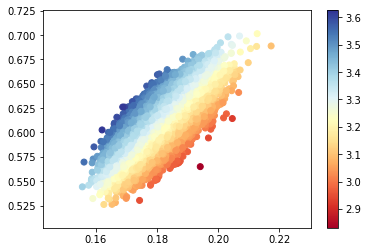

In [40]:
#Create scatter plot of random porfolio, coloured by Sharpe Ratio
plt.scatter(results_frame.Annualised_Volatility,results_frame.Annualised_Return,c=results_frame.Sharpe_Ratio,cmap='RdYlBu')
plt.colorbar()

In [41]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratio'].idxmax()] #locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Annualised_Volatility'].idxmin()] #locate positon of portfolio with maximum expected return
max_ret_port = results_frame.iloc[results_frame['Annualised_Return'].idxmax()]

In [42]:
print ('Portfolio with highest Sharpe Ratio') 
print ('-----------------------------------') 
print (max_sharpe_port)
print ('===================================') 
print ('Portfolio with lowest expected volatility') 
print ('-----------------------------------') 
print (min_vol_port)
print ('===================================') 
print ('Portfolio with maximum return') 
print ('-----------------------------------')
print (max_ret_port)

Portfolio with highest Sharpe Ratio
-----------------------------------
Annualised_Return        0.602618
Annualised_Volatility    0.162029
Sharpe_Ratio             3.625380
LDOS                     0.174723
WU                       0.161452
GPN                      0.070403
ANSS                     0.003105
AAPL                     0.071028
ACN                      0.140492
KLAC                     0.018782
CDW                      0.034530
MSFT                     0.048734
MA                       0.012521
PAYC                     0.065470
LRCX                     0.063618
XRX                      0.085364
SNPS                     0.009436
V                        0.040342
Name: 9701, dtype: float64
Portfolio with lowest expected volatility
-----------------------------------
Annualised_Return        0.544204
Annualised_Volatility    0.155569
Sharpe_Ratio             3.400449
LDOS                     0.071982
WU                       0.148591
GPN                      0.146351
ANSS   

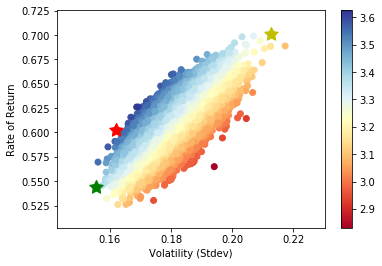

In [43]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.Annualised_Volatility,results_frame.Annualised_Return,c=results_frame.Sharpe_Ratio,cmap='RdYlBu')
plt.xlabel('Volatility (Stdev)') 
plt.ylabel('Rate of Return') 
plt.colorbar()
#plot green star to highlight position of minimum variance portfolio 
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=200)
#plot yellow star to highlight position of minimum variance portfolio 
plt.scatter(max_ret_port[1],max_ret_port[0],marker=(5,1,0),color='y',s=200)
#plot red star to highlight position of portfolio with highest Sharpe Ratio 
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=200)

In [54]:
#Performance of investing only S&P 500 Information Technology (INDEX) 
SP5INFT = pd.read_csv("SP5INFT.csv", sep=",")

In [55]:
SP5INFT.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-31,1611.17,1605.15,1611.62,1597.34,238.51M,0.00
1,2019-12-30,1605.15,1614.70,1614.70,1592.44,250.26M,-0.01
2,2019-12-27,1614.70,1614.34,1619.99,1610.12,238.04M,0.00
3,2019-12-26,1614.34,1602.48,1614.42,1602.48,221.79M,0.01
4,2019-12-24,1602.48,1601.86,1604.21,1598.74,138.88M,0.00


In [56]:
import datetime
SP5INFT['Date'] = pd.to_datetime(SP5INFT['Date'])

In [57]:
SP5INFT = SP5INFT.set_index('Date')

In [58]:
# make sure the Price column is float64 or int, that can do the function pct_change ()
SP5INFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-31 to 2019-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     252 non-null    float64
 1   Open      252 non-null    float64
 2   High      252 non-null    float64
 3   Low       252 non-null    float64
 4   Vol.      252 non-null    object 
 5   Change %  252 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.8+ KB


In [59]:
SP5INFT.sort_index(inplace=True)

In [60]:
SP5INFT

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-02,1089.04,1088.31,1095.27,1066.84,-,0.00
2019-01-03,1033.85,1089.04,1089.04,1032.42,-,-0.05
2019-01-04,1079.29,1033.85,1083.84,1033.85,-,0.04
2019-01-07,1088.59,1079.29,1096.50,1077.13,-,0.01
2019-01-08,1098.35,1088.59,1103.21,1085.24,-,0.01
...,...,...,...,...,...,...
2019-12-24,1602.48,1601.86,1604.21,1598.74,138.88M,0.00
2019-12-26,1614.34,1602.48,1614.42,1602.48,221.79M,0.01
2019-12-27,1614.70,1614.34,1619.99,1610.12,238.04M,0.00


In [61]:
SP5INFT_returns = SP5INFT['Price'].pct_change()

In [62]:
SP5INFT_mean_daily_returns = SP5INFT_returns.mean()

In [63]:
SP5INFT_annualised_return = round(SP5INFT_mean_daily_returns * 252,2) 
SP5INFT_annualised_return

0.41

In [64]:
z = SP5INFT_annualised_return
u = max_sharpe_port[0]
w = u-z
print("annualised returns of Maximum Sharpe Ratio Portfolio:\n", str(round(u,2))," \n")
print("annualised returns of Benchmark Index:\n", str(round(z,2)))
print("\nMaximum Sharpe Ratio returns are greater than Benchmark by:\n", str(round (w,2)))

annualised returns of Maximum Sharpe Ratio Portfolio:
 0.6  

annualised returns of Benchmark Index:
 0.41

Maximum Sharpe Ratio returns are greater than Benchmark by:
 0.19


In [65]:
# draw a line chart like below 
plt.style.use('fivethirtyeight')

In [66]:
np.random.seed(42)

In [67]:
# This magic command draws graphics directly in the notebook, do not need 'plt.show ()'
%matplotlib inline

In [68]:
# optimize the graph
%config InlineBackend.figure_format = 'retina'

In [69]:
stocks

['LDOS',
 'WU',
 'GPN',
 'ANSS',
 'AAPL',
 'ACN',
 'KLAC',
 'CDW',
 'MSFT',
 'MA',
 'PAYC',
 'LRCX',
 'XRX',
 'SNPS',
 'V']

In [70]:
d = pd.DataFrame()

In [71]:
d.colums = stocks

/Users/wanting/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [78]:
for sym in stocks:
    d[sym] = web.DataReader(sym, data_source='yahoo',start='01/01/2019', end='01/01/2020')['Adj Close']

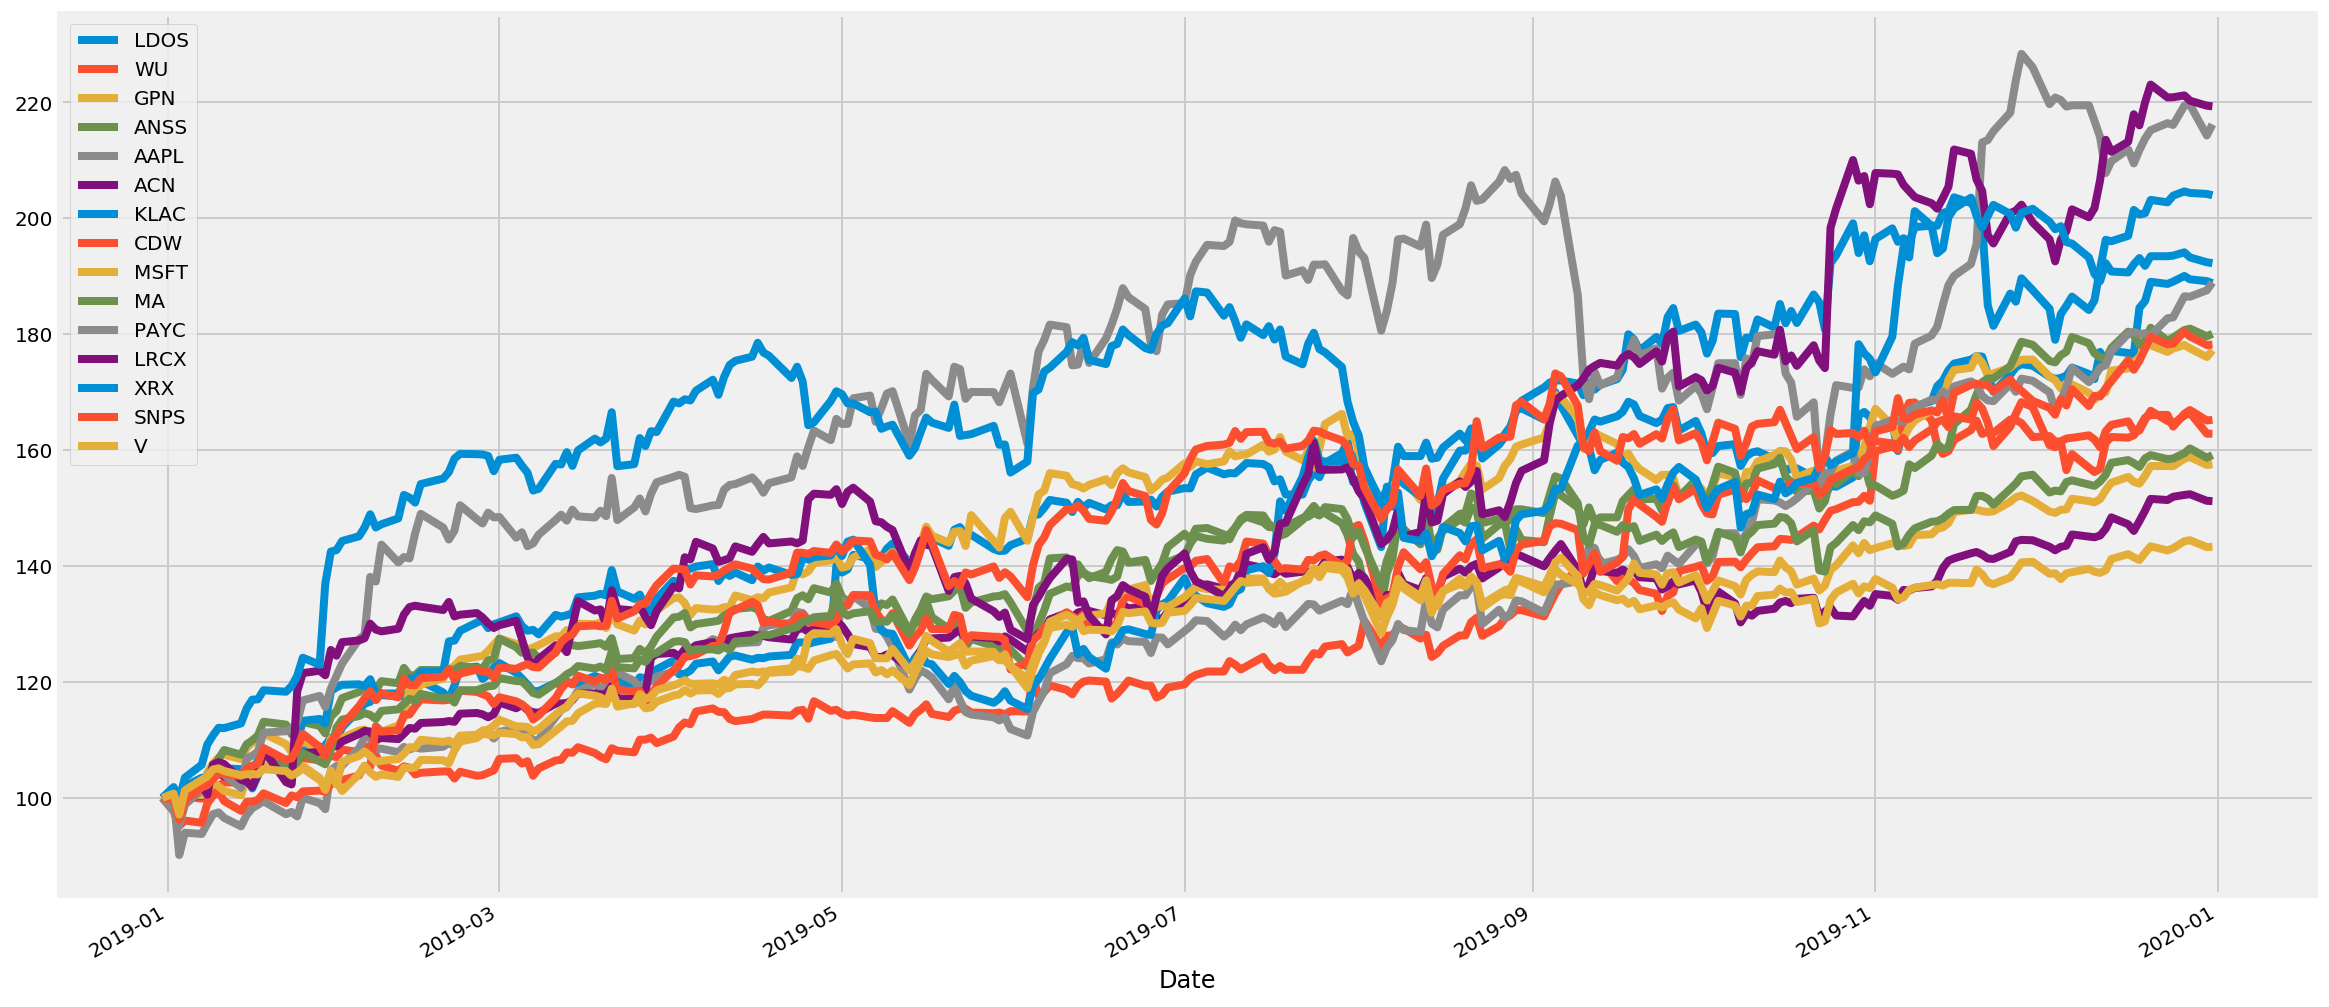

In [79]:
(d / d.iloc[0]* 100).plot(figsize=(18,9))

In [80]:
d.head()

,LDOS,WU,GPN,ANSS,AAPL,ACN,KLAC,CDW,MSFT,MA,PAYC,LRCX,XRX,SNPS,V
Date,,,,,,,,,,,,,,,
2018-12-31,51.095776,15.798675,102.548470,142.940002,38.518612,137.053207,85.793236,79.127998,99.040863,186.363770,122.449997,131.148773,18.401049,84.239998,130.296753
2019-01-02,50.446423,15.872759,101.454681,143.009995,38.562561,136.644974,87.154579,77.292572,98.602066,187.440567,119.699997,133.200256,18.745604,84.050003,131.264542
2019-01-03,49.748604,15.622725,98.163345,137.639999,34.721451,131.979675,82.265259,75.300957,94.974693,178.984314,116.500000,126.776184,18.335861,81.110001,126.534225
2019-01-04,51.735443,15.826459,102.170601,143.660004,36.203678,137.111526,87.528465,76.033157,99.391899,187.460342,121.019997,132.969086,19.043596,83.900002,131.985474
2019-01-07,51.851746,15.780155,104.308495,147.320007,36.123104,137.587784,88.774765,75.730515,99.518669,188.902649,124.110001,134.153717,19.453333,85.760002,134.365448


In [81]:
daily_return = d.pct_change()

In [82]:
daily_return.head()

,LDOS,WU,GPN,ANSS,AAPL,ACN,KLAC,CDW,MSFT,MA,PAYC,LRCX,XRX,SNPS,V
Date,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.012709,0.004689,-0.010666,0.000490,0.001141,-0.002979,0.015868,-0.023196,-0.004430,0.005778,-0.022458,0.015642,0.018725,-0.002255,0.007428
2019-01-03,-0.013833,-0.015752,-0.032441,-0.037550,-0.099607,-0.034142,-0.056099,-0.025767,-0.036788,-0.045114,-0.026733,-0.048229,-0.021858,-0.034979,-0.036037
2019-01-04,0.039938,0.013041,0.040822,0.043737,0.042689,0.038884,0.063978,0.009724,0.046509,0.047356,0.038798,0.048849,0.038598,0.034398,0.043081
2019-01-07,0.002248,-0.002926,0.020925,0.025477,-0.002226,0.003474,0.014239,-0.003980,0.001275,0.007694,0.025533,0.008909,0.021516,0.022169,0.018032


Text(0, 0.5, 'daily returns')

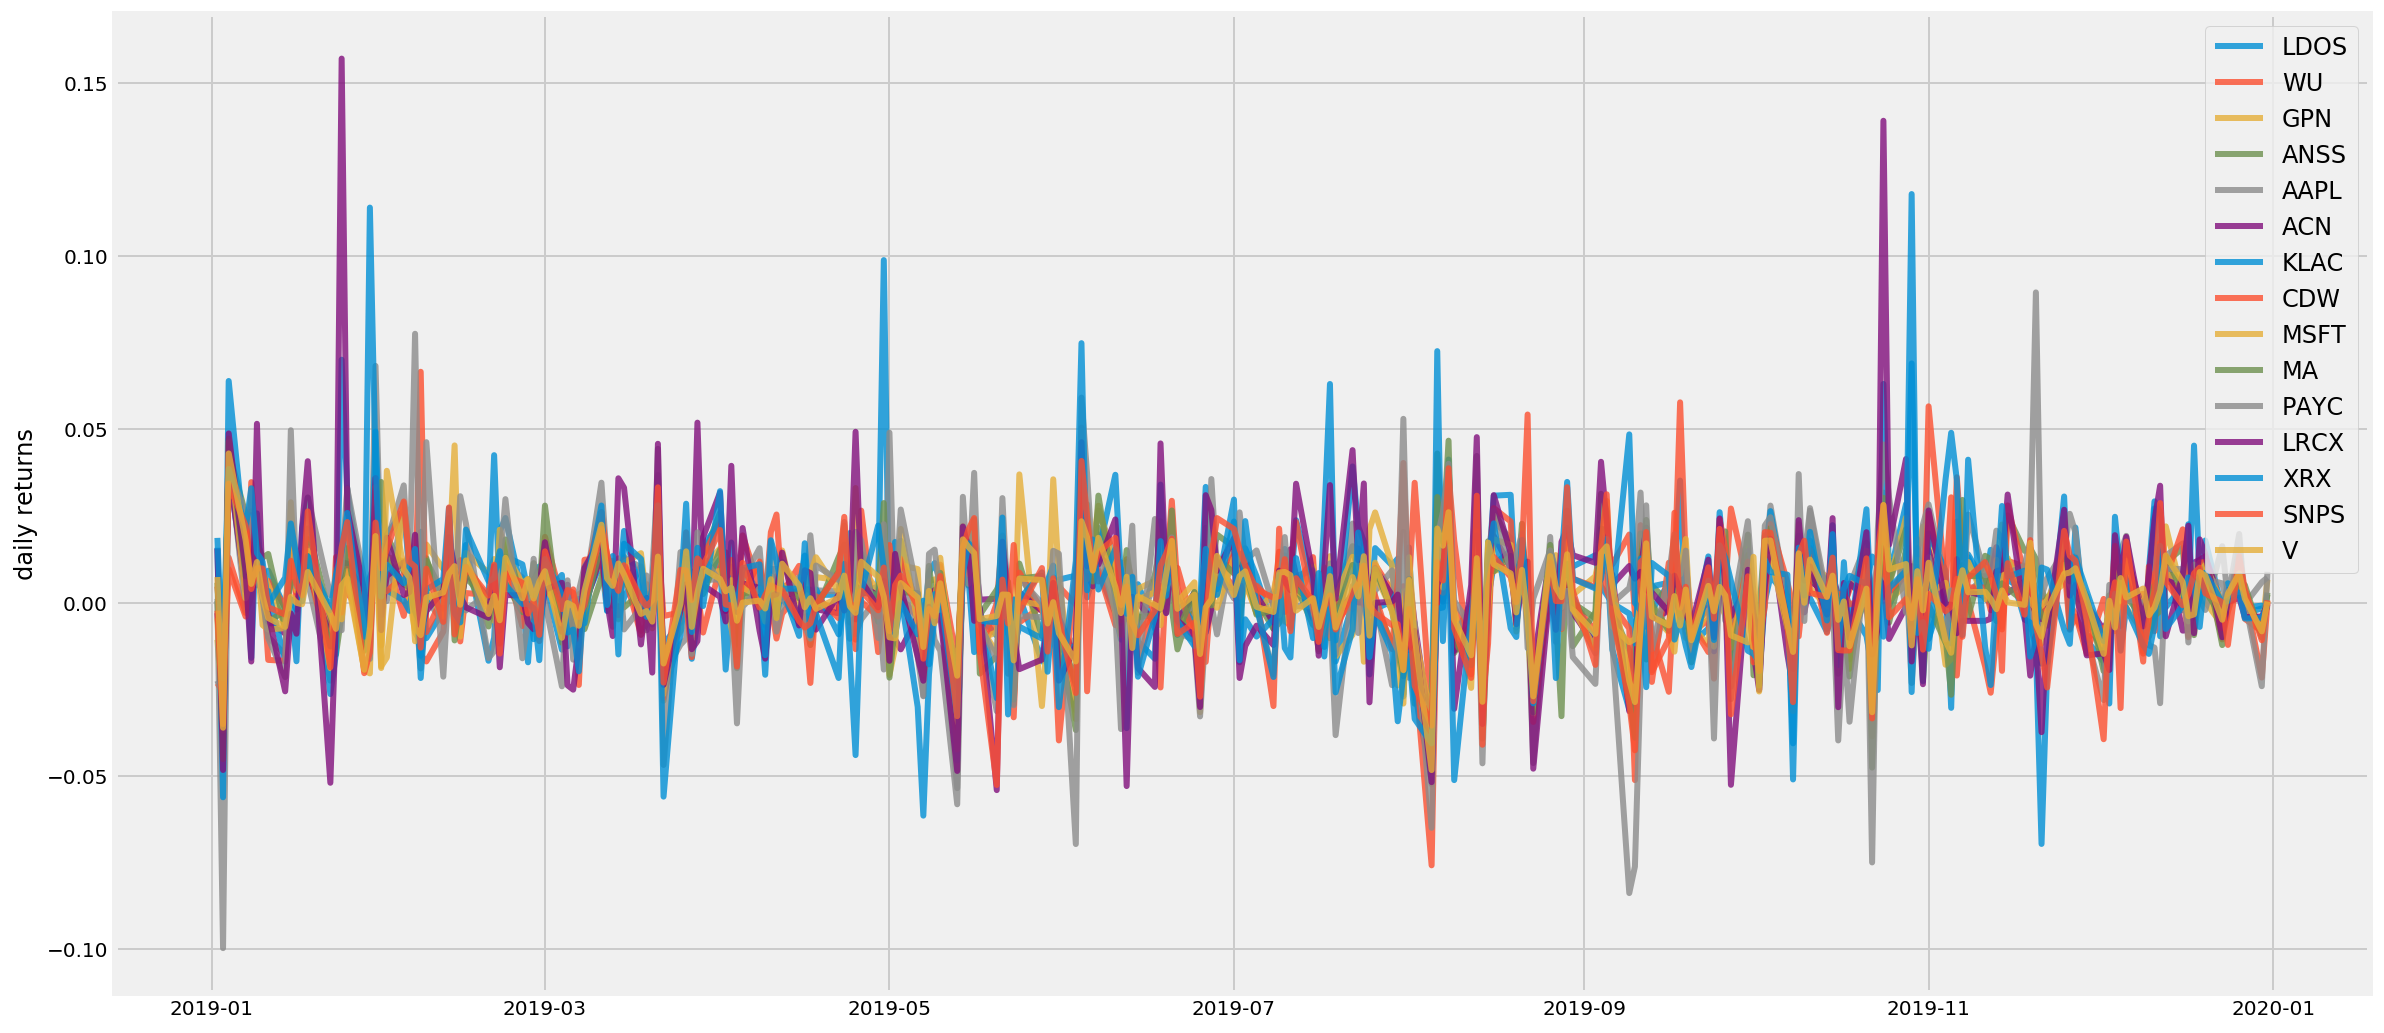

In [84]:
plt.figure(figsize=(18, 9))
for c in daily_return.columns.values:
    plt.plot(daily_return.index, returns[c], lw=3, alpha=0.8,label=c) 
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [85]:
# Volatility of stock price

In [86]:
AAPL_data = web.DataReader ('AAPL',data_source = 'yahoo',start='01/01/2019', end='01/01/2020')

In [87]:
AAPL_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.518612
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.562561
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.721451
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.203678
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.123104


In [89]:
_ripple_radio = lambda AAPL_data: AAPL_data.High.max() / AAPL_data.Low.min()
ripple_radio = AAPL_data.Low.idxmin() < AAPL_data.High.idxmax() and _ripple_radio(AAPL_data) or -_ripple_radio(AAPL_data)
ripple_radio

2.0702112762021345

In [92]:
df = []
for i in stocks:
    data = web.DataReader (i,data_source = 'yahoo',start='01/01/2019', end='01/01/2020')
    _ripple_radio = lambda data: data.High.max() / data.Low.min()
    ripple_radio = (data.Low.idxmin() < data.High.idxmax()) and _ripple_radio(data) or -_ripple_radio(data)
    df += [ripple_radio]

In [93]:
df

[1.9494670831759877,
 1.66567524625619,
 1.8812906124385143,
 1.8966020654886222,
 2.0702112762021345,
 1.57287208378806,
 2.100011574527492,
 1.905481760611924,
 1.6414609882829136,
 1.6660957337696198,
 2.4337130763963524,
 2.279330039866852,
 2.0621735882630094,
 1.8099470056956355,
 1.4849077531128354]

In [96]:
Vol = pd.DataFrame(df, stocks) 
Vol.columns = ['vol'] 
Vol.sort_values(by='vol', ascending=False)

,vol
PAYC,2.433713
LRCX,2.279330
KLAC,2.100012
AAPL,2.070211
XRX,2.062174
LDOS,1.949467
CDW,1.905482
ANSS,1.896602
GPN,1.881291
SNPS,1.809947


In [98]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix): 
    returns = np.sum(mean_returns*weights) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252) 
    return std, returns

In [100]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix): 
    results = np.zeros((4+len(stocks)-1,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.array(np.random.random(15))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev 
        results[1,i] = portfolio_return 
        results[2,i] = (results[1,i]) / results[0,i]
    return results, weights_record

In [101]:
weights

array([0.08581342, 0.12614117, 0.09177989, 0.01711085, 0.04102076,
       0.06237789, 0.03259174, 0.11344877, 0.14672996, 0.00064328,
       0.08230672, 0.03677249, 0.00843369, 0.11908221, 0.03574716])

In [102]:
stocks

['LDOS',
 'WU',
 'GPN',
 'ANSS',
 'AAPL',
 'ACN',
 'KLAC',
 'CDW',
 'MSFT',
 'MA',
 'PAYC',
 'LRCX',
 'XRX',
 'SNPS',
 'V']

In [103]:
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2019', end='01/01/2020')['Adj Close']

In [104]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000

In [107]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios): 
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix)
    max_sharpe_idx = np.argmax(results[2]) # argmax : returns the indices of the maxi mum values along an axis.
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation. allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    max_ret_idx = np.argmax(results[1])
    sdp_max, rp_max = results[0,max_ret_idx], results[1,max_ret_idx]
    max_ret_allocation = pd.DataFrame(weights[max_ret_idx],index=data.columns,columns=['allocation'])
    max_ret_allocation.allocation = [round(i*100,2)for i in max_ret_allocation.allocation]
    max_ret_allocation = max_ret_allocation.T
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n") 
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n") 
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2)) 
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Maximum Return Portfolio Allocation\n") 
    print ("Annualised Return:", round(rp_max,2))
    print ("Annualised Volatility:", round(sdp_max,2)) 
    print ("\n")
    print (max_ret_allocation)
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s =30, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility ')
    plt.scatter(sdp_max,rp_max,marker='*',color='y',s=500, label='Maximum return') 
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier') 
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [108]:
max_sharpe_idx = np.argmax(results[2])

In [109]:
max_sharpe_idx

9701

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.6
Annualised Volatility: 0.16


Symbols      LDOS     WU   GPN  ANSS  AAPL    ACN  KLAC   CDW  MSFT    MA  \
allocation  17.47  16.15  7.04  0.31   7.1  14.05  1.88  3.45  4.87  1.25   

Symbols     PAYC  LRCX   XRX  SNPS     V  
allocation  6.55  6.36  8.54  0.94  4.03  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.54
Annualised Volatility: 0.16


Symbols     LDOS     WU    GPN  ANSS  AAPL    ACN  KLAC    CDW  MSFT   MA  \
allocation   7.2  14.86  14.64  6.59  1.46  12.69   0.3  13.32  1.83  1.1   

Symbols     PAYC  LRCX   XRX  SNPS      V  
allocation   1.1   0.4  6.91  3.02  14.59  
--------------------------------------------------------------------------------
Maximum Return Portfolio Allocation

Annualised Return: 0.7
Annualised Volatility:

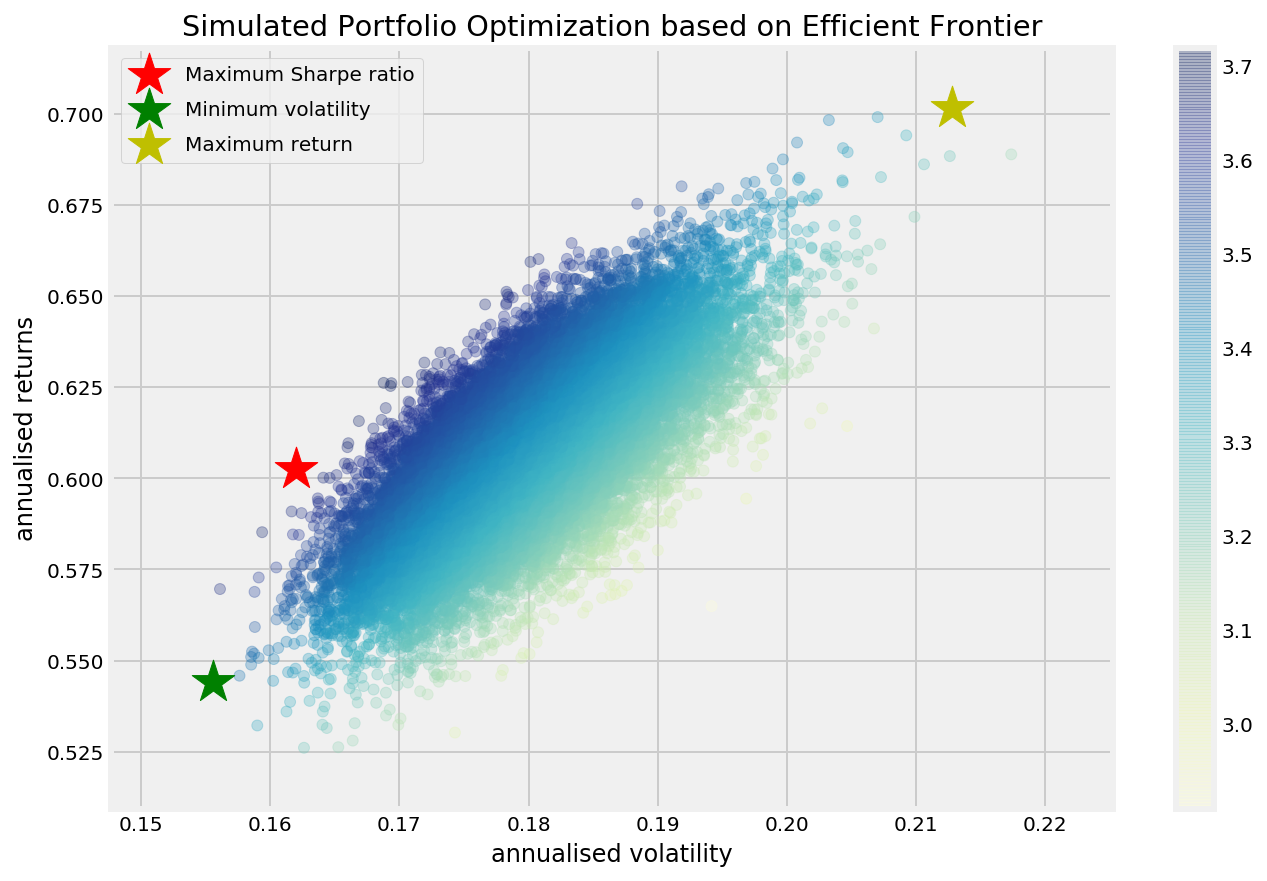

In [110]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios)

In [111]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret) / p_var
def max_sharpe_ratio(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [112]:
max_sharpe = max_sharpe_ratio(mean_returns,cov_matrix)

In [113]:
max_sharpe

     fun: -3.9593486040887487
     jac: array([ 9.67532396e-04, -9.80854034e-04, -4.99933958e-04,  1.14288211e-01,
        8.18073750e-05,  4.38117981e-01, -7.40349293e-04,  7.63803720e-04,
        4.94303674e-01,  8.85897487e-01, -6.86317682e-04,  1.14262104e-04,
        7.28160143e-04,  9.76708651e-01,  8.81594837e-01])
 message: 'Optimization terminated successfully.'
    nfev: 179
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([2.90472951e-01, 3.05482798e-01, 9.48866700e-02, 9.40924208e-17,
       8.09890482e-02, 4.06967734e-17, 1.98798101e-02, 6.62510994e-02,
       4.92335010e-17, 2.22501764e-16, 3.97665878e-02, 3.96892338e-02,
       6.25818016e-02, 2.69546498e-17, 1.65474857e-16])

In [114]:
max_sharpe['x']

array([2.90472951e-01, 3.05482798e-01, 9.48866700e-02, 9.40924208e-17,
       8.09890482e-02, 4.06967734e-17, 1.98798101e-02, 6.62510994e-02,
       4.92335010e-17, 2.22501764e-16, 3.97665878e-02, 3.96892338e-02,
       6.25818016e-02, 2.69546498e-17, 1.65474857e-16])

In [115]:
max_sharpe.x

array([2.90472951e-01, 3.05482798e-01, 9.48866700e-02, 9.40924208e-17,
       8.09890482e-02, 4.06967734e-17, 1.98798101e-02, 6.62510994e-02,
       4.92335010e-17, 2.22501764e-16, 3.97665878e-02, 3.96892338e-02,
       6.25818016e-02, 2.69546498e-17, 1.65474857e-16])

In [117]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]
def min_variance(mean_returns, cov_matrix): 
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [118]:
def neg_return(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1] * - 1
def max_return(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_return, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [123]:
def efficient_return(mean_returns, cov_matrix, target): 
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result
def efficient_frontier(mean_returns, cov_matrix, returns_range): 
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret)) 
    return efficients

In [125]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios): 
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix)
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    #max_ret = max_return(mean_returns, cov_matrix)
    #sdp_max, rp_max = portfolio_annualised_performance(max_ret['x'], mean_returns, c ov_matrix)
    #max_ret_allocation = pd.DataFrame(max_ret.x,index=data.columns,columns=['allocat ion'])
    #max_ret_allocation.allocation = [round(i*100,2)for i in max_ret_allocation.alloc ation]
    #max_ret_allocation = max_ret_allocation.T
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n") 
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n") 
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2)) 
    print ("\n")
    print (min_vol_allocation)
    #print ("-"*80)
    #print ("Maximum Return Portfolio Allocation\n") 
    #print ("Annualised Return:", round(rp_max,2)) 
    #print ("Annualised Volatility:", round(sdp_max,2)) 
    #print ("\n")
    #print (max_ret_allocation)
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s =50, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    #plt.scatter(sdp_max,rp_max,marker='*',color='y',s=500, label='Maximum return')
    #target = np.linspace(rp_max, 0.32, 50)
    #plt.scatter(tvols, trets, c=trets / tvols, marker='x')
    target = np.linspace(0.7, 0.52, 50)
    #target = np.linspace(rp_max, 0.52, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier') 
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.62
Annualised Volatility: 0.16


Symbols      LDOS     WU   GPN  ANSS  AAPL  ACN  KLAC   CDW  MSFT   MA  PAYC  \
allocation  29.05  30.55  9.49   0.0   8.1  0.0  1.99  6.63   0.0  0.0  3.98   

Symbols     LRCX   XRX  SNPS    V  
allocation  3.97  6.26   0.0  0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.5
Annualised Volatility: 0.14


Symbols      LDOS     WU  GPN  ANSS  AAPL    ACN  KLAC   CDW  MSFT   MA  PAYC  \
allocation  13.38  35.02  0.0   0.0   0.0  26.28   0.0  5.27   6.6  0.0   0.0   

Symbols     LRCX   XRX  SNPS      V  
allocation   0.0  1.04   0.0  12.41  


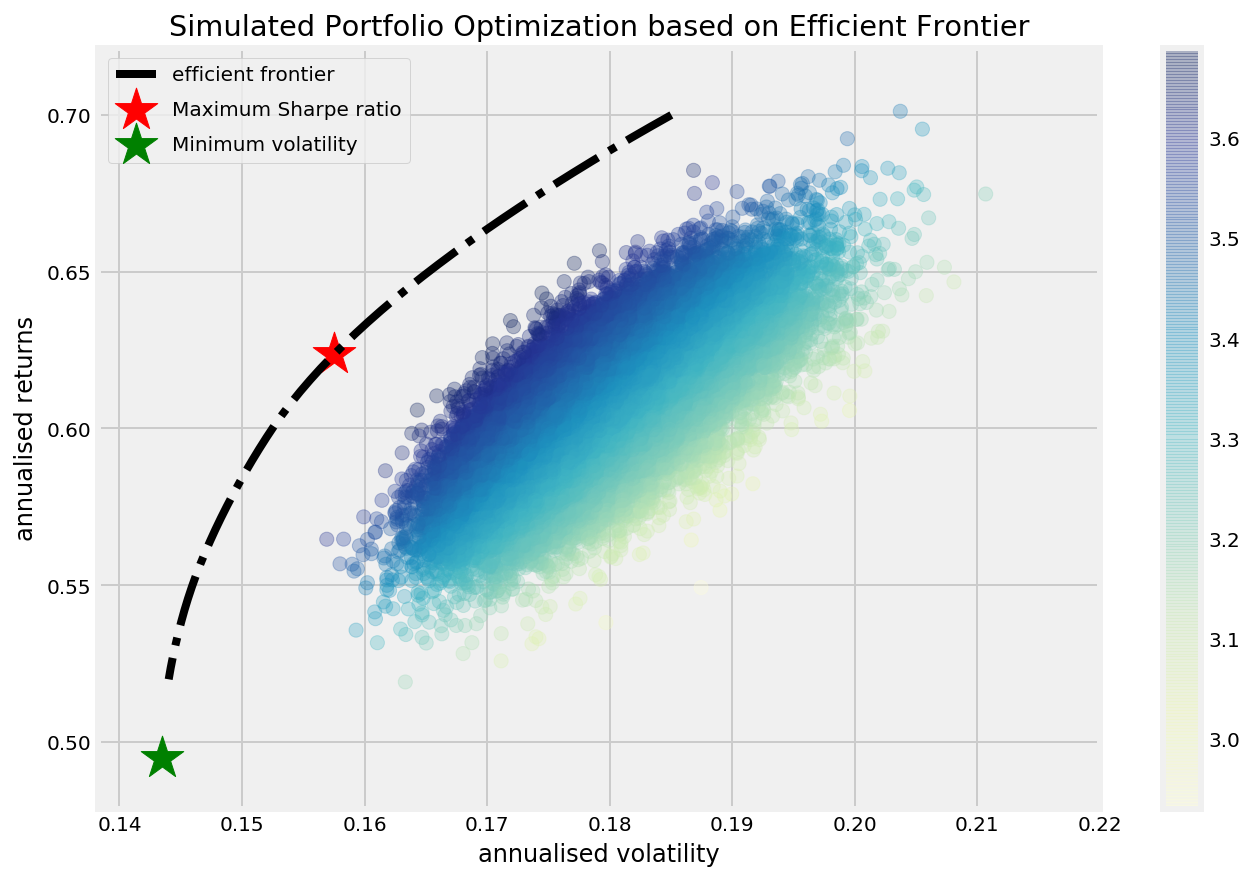

In [126]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios)

In [127]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(returns.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights))) * np.sqrt(252) 
    return np.array([pret, pvol, pret / pvol])

Our first problem will try to maximise the Sharpe ratio (or minimise the negative of the Sharpe ratio). Our decision variables for the problem are the weights. We need to specify the constraints of our optimisation problem, namely the sum of all weights should add up to 1 and all weights need to be between 0 and 1

In [128]:
noa = len(stocks)

In [129]:
def min_func_sharpe(weights): 
    return -statistics(weights)[2]
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) 
bnds = tuple((0, 1) for x in range(noa))

In order to kick start the optimisation algorithm, we need to make an initial guess on these weights. We will guess them to be equal (0.2 each) and solve the minimisation problem.

In [130]:
noa * [1. / noa,]

[0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

In [132]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
opts

     fun: -3.9593486040887487
     jac: array([ 9.67532396e-04, -9.80854034e-04, -4.99933958e-04,  1.14288211e-01,
        8.18073750e-05,  4.38117981e-01, -7.40349293e-04,  7.63803720e-04,
        4.94303674e-01,  8.85897487e-01, -6.86317682e-04,  1.14262104e-04,
        7.28160143e-04,  9.76708651e-01,  8.81594837e-01])
 message: 'Optimization terminated successfully.'
    nfev: 179
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([2.90472951e-01, 3.05482798e-01, 9.48866700e-02, 9.40924208e-17,
       8.09890482e-02, 4.06967734e-17, 1.98798101e-02, 6.62510994e-02,
       4.92335010e-17, 2.22501764e-16, 3.97665878e-02, 3.96892338e-02,
       6.25818016e-02, 2.69546498e-17, 1.65474857e-16])

In [133]:
opts['x'].round(3)

array([0.29 , 0.305, 0.095, 0.   , 0.081, 0.   , 0.02 , 0.066, 0.   ,
       0.   , 0.04 , 0.04 , 0.063, 0.   , 0.   ])

In [134]:
statistics(opts['x']).round(3)

array([0.624, 0.158, 3.959])

In [135]:
def min_func_variance(weights): 
    return statistics(weights)[1] ** 2

In [136]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

In [137]:
optv['x'].round(3)

array([0.138, 0.351, 0.   , 0.   , 0.   , 0.248, 0.   , 0.056, 0.07 ,
       0.   , 0.   , 0.   , 0.009, 0.   , 0.129])

In [138]:
statistics(optv['x']).round(3)

array([0.496, 0.144, 3.457])

In [139]:
def min_func_port(weights): 
    return statistics(weights)[1]

In [140]:
trets = np.linspace(0.0, 0.25, 50) 
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun']) 
tvols = np.array(tvols)